## FETAL HEALTH CLASSIFICATION 


## Importing the libraries required

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

## Reading the data


In [3]:
df=pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Information about the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

# Shape of the data

In [7]:
df.shape

(2126, 22)

##Describe() is used to view some basic statistical details like mean,std etc.

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## Check if any null values is present in the given data

In [11]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

## Duplicate values in the given data

In [14]:
df.duplicated().sum()

13

## Drop the duplicates found in the data

In [17]:
df.drop_duplicates()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Importing matplot library to plot the data

In [19]:
import matplotlib.pyplot as plt


## Check whether the data is balanced or imbalanced

Text(0.5, 1.0, 'fetal health')

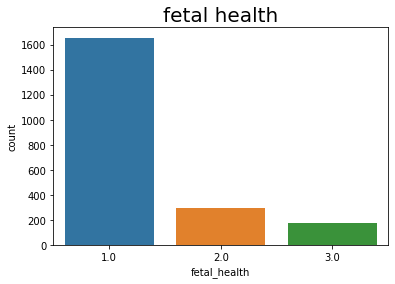

In [21]:
sns.countplot(data = df,x = "fetal_health")
plt.title("fetal health",fontsize = 20)

## Coorelation of the data

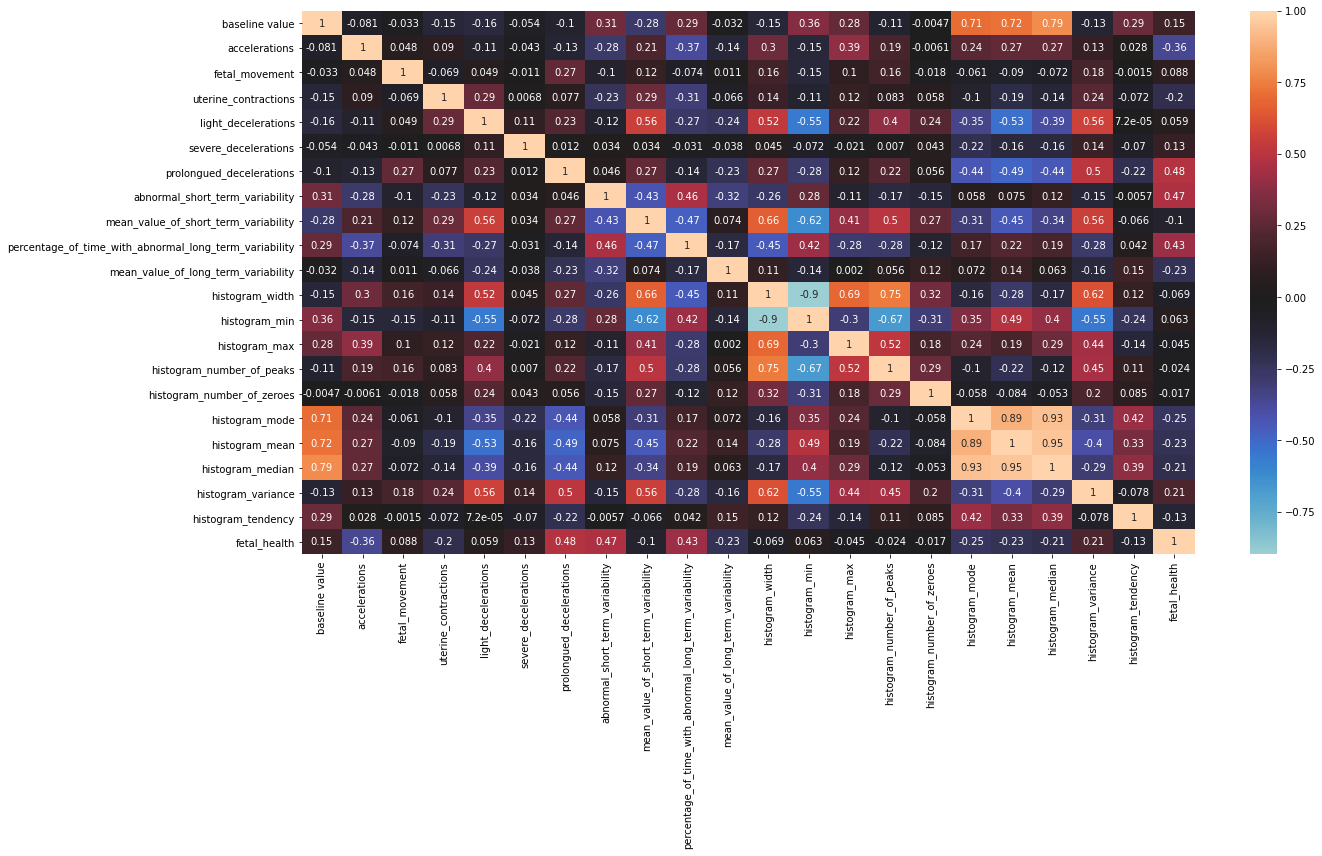

In [23]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, center=0)



In [24]:
plot=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability']


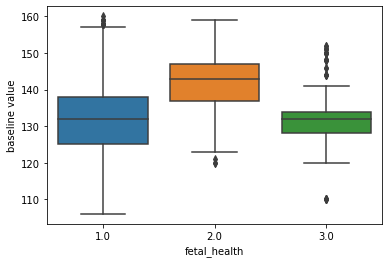

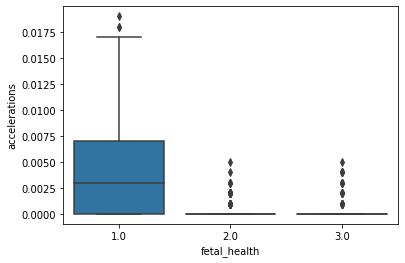

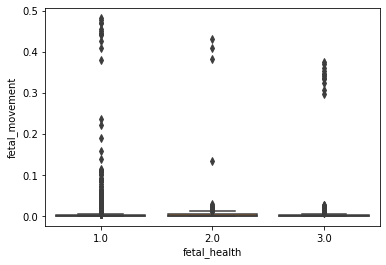

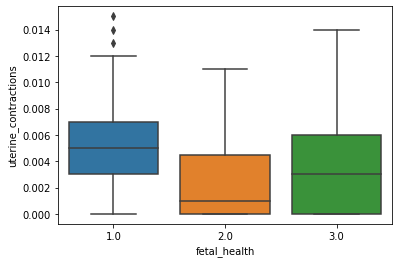

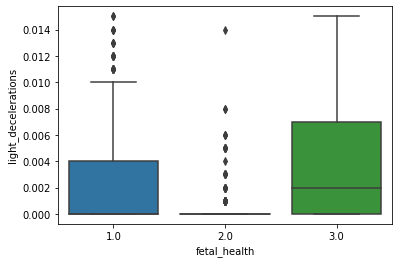

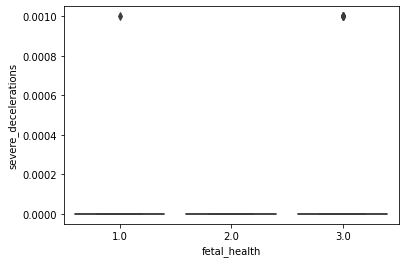

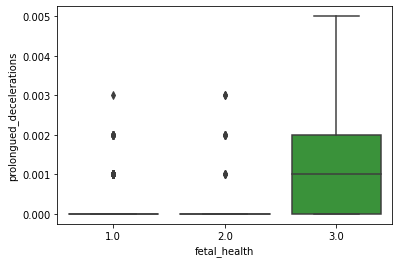

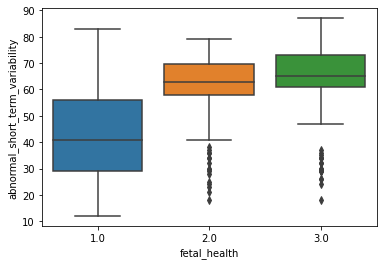

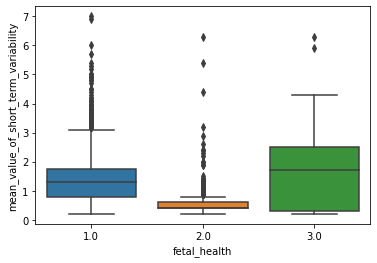

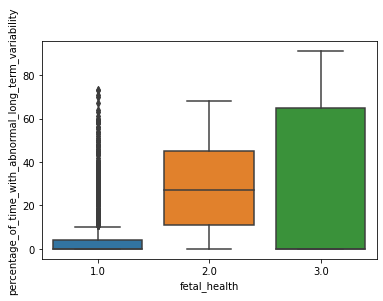

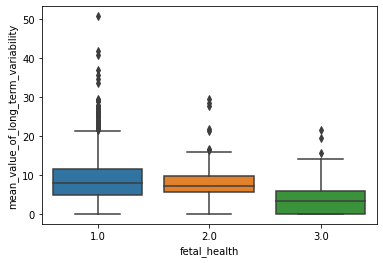

In [25]:

for i in plot:
    sns.boxplot(x=df["fetal_health"], y=df[i])
    plt.show()

## seperating dependent and independent variables

In [29]:
x = df.iloc[:,0: -1]
y = df.iloc[:,-1]

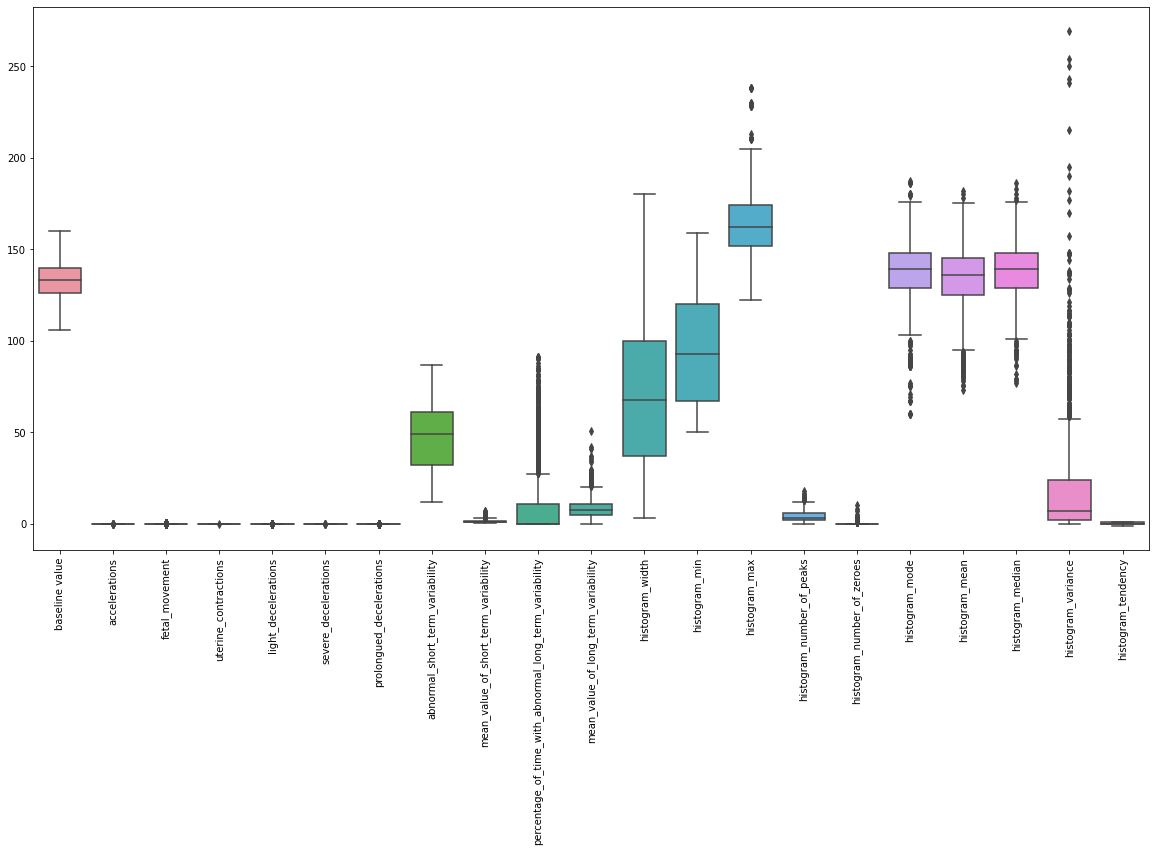

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(data =x)
plt.xticks(rotation=90)
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix, classification_report,accuracy_score

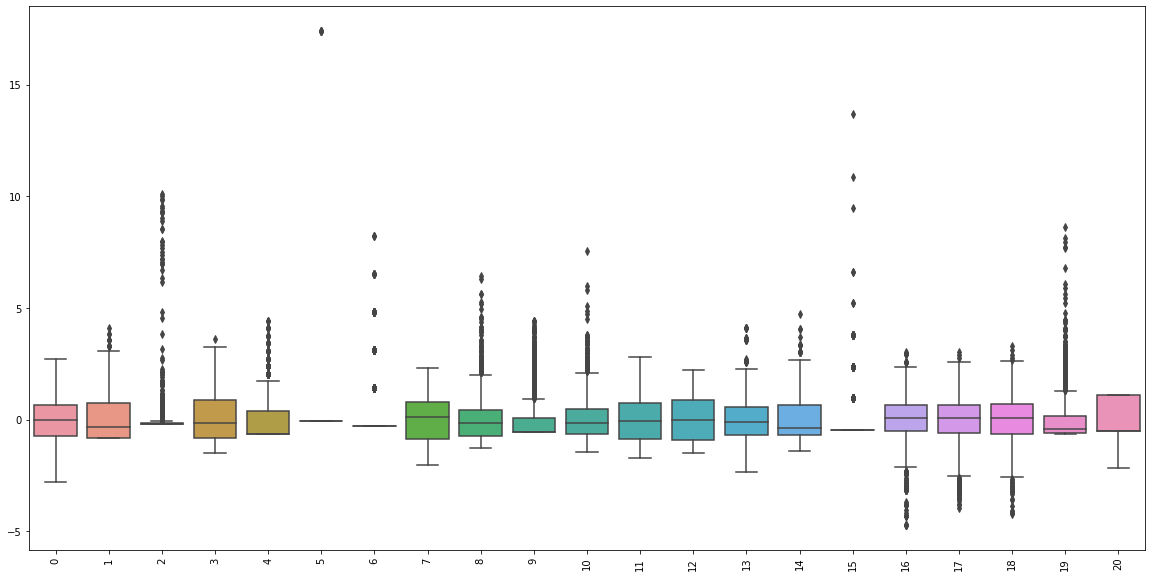

In [31]:
sc=StandardScaler()
x=sc.fit_transform(x)
plt.figure(figsize=(20,10))
sns.boxplot(data =x)
plt.xticks(rotation=90)
plt.show()

## Splitting the data

In [32]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Model building

In [37]:
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])
pipeline_dT=Pipeline([ ('dT_classifier',DecisionTreeClassifier(random_state=42))])
pipeline_Rf=Pipeline([('Rf_classifier',RandomForestClassifier())])
pipeline_svc=Pipeline([('svc',SVC())])
pipelines = [pipeline_lr, pipeline_dT, pipeline_Rf, pipeline_svc]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


## Using pipelines to get faster results

In [40]:
for pipes in pipelines:
  pipes.fit(X_train,y_train)

In [42]:
cv_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))


Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.939529 
SVC: 0.906594 


## From the above results Random forest gave me more accuracy,so evaluating the random forest

In [49]:
Rf =RandomForestClassifier()
Rf.fit( X_train,y_train)
k = Rf.predict(X_test)
accuracy=accuracy_score(y_test,k)
accuracy

0.9404388714733543

In [51]:
param_grid={'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

In [53]:
Grid_cv_Rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)
Grid_cv_Rf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [54]:
Grid_cv_Rf.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -1}

In [55]:
RF=RandomForestClassifier(**Grid_cv_Rf.best_params_)
RF.fit(X_train,y_train)
predictions=RF.predict(X_test)
Accuracy=accuracy_score(y_test,predictions)*100
print('ACCURACY SCORE:',Accuracy)

ACCURACY SCORE: 94.35736677115987


In [64]:
clf = GradientBoostingClassifier(n_estimators=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9592476489028213

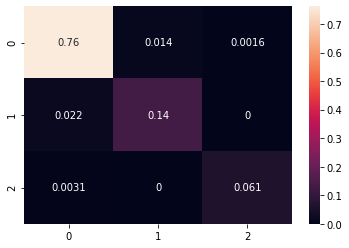

In [68]:
cf=confusion_matrix(y_test,y_pred)
sns.heatmap(cf/np.sum(cf),annot=True)